# Groove based workpiece data and geometry

[<< PREVIOUS TUTORIAL](01_02_time_dependent_data.ipynb) | [NEXT TUTORIAL >>](01_01_introduction.ipynb)

## Overview

**This tutorial covers:**

Working with workpiece related data that can be described by a 2 dimensional groove and a seam length 

**Requirements:**

- Opening and navigating through WelDX files ([tutorial](01_01_introduction.ipynb))

In [1]:
# download the example file for this tutorial

from util import download_tutorial_input_file

download_tutorial_input_file(print_status=False)

## Plotting the specimen's groove

An important piece that will be part of most WelDX files is the specimen data.
The complexity of a specimen can range from a single metal plate to complex 3 dimensional multi-part structures.
In this tutorial, we will discuss specimen geometries based on a 2-dimensional cross-section that is extruded into 3d space.

First we open the example file and examine the workpiece information.

In [2]:
from weldx import WeldxFile

wxfile = WeldxFile("single_pass_weld.wx")

c:\users\vhirtham\pycharmprojects\bam\libo\libo\__init__.py:29: UserWarning: Using local libo package files without version information.
Consider running 'python setup.py --version' or 'pip install -e .' in the libo root repository
  warnings.warn(
c:\users\vhirtham\pycharmprojects\bam\libo\libo\__init__.py:29: UserWarning: Using local libo package files without version information.
Consider running 'python setup.py --version' or 'pip install -e .' in the libo root repository
  warnings.warn(
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\asdf\asdf.py:329: AsdfWarning: File 'file:///C:/Users/vhirtham/PycharmProjects/bam/weldx/tutorials/single_pass_weld.wx' was created with extension URI 'asdf://weldx.bam.de/weldx/extensions/weldx-0.1.0' (from package weldx==0.5.0), which is not currently installed
  warnings.warn(msg, AsdfWarning)


In [3]:
wxfile.info(path=("workpiece",))

root (dict)
├─base_metal (dict)
│ ├─common_name (str)
│ └─standard (str)
└─geometry (dict)
  ├─groove_shape (VGroove)
  └─seam_length (Q_)


The workpiece data of this particular file consists of two parts:

- `base_metal`
- `geometry`

The `base_metal` field contains information about the composition of the specimens material, which is not relevant for this tutorial.
We are only interested in the `geometry` section that is further divided into: 

- `groove_shape`
- `seam_length`

`groove_shape` describes the 2 dimensional cross-section of the specimen.
We can already see, that it is of type `VGroove`.
This object is based on the V-Groove described by ISO 9692-1.
The norm specifies the shape of the groove by different shape parameters.
We could now inspect the different parameter values and look up what meaning they have.
However, this would be rather tedious.
A much simpler way is to use the `plot` method of the groove object:

C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_lo

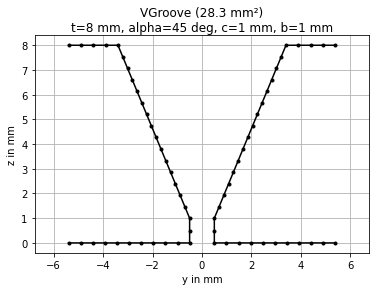

In [4]:
groove = wxfile["workpiece"]["geometry"]["groove_shape"]
groove.plot()

Apart from the visual representation, the plot also contains all relevant information like the groove's area and the ISO 9692-1 parameters.

## Other cross-sections

Not all specimens might have a cross-section that is described by a norm, or the norm it uses might simply be not considered in the WelDX API.
For such cases, WelDX provides a more generalized class called `Profile`.
It allows us to define arbitrary cross-sections based on simple geometric elements such as lines and arcs.
So be aware, that you might get a `Profile` instead one of the available groove types out of a WelDX file.
In fact, all groove types are based on the `Profile` class, and we can convert them with the `to_profile` method:

In [5]:
profile = groove.to_profile()
type(profile)

C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_lo

weldx.geometry.Profile

We can plot the content of a `Profile` the same way as we did before with the groove:

C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_lo

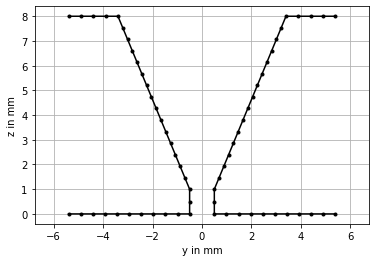

In [6]:
profile.plot()

The only difference here is that we don't get the additional, norm-related information.

## 3d plot (matplotlib)

We can also create a nice 3d plot from the groove and the seam length stored in the WelDX file.
All we need for this is the `Geometry` class of WelDX.
It can be created from a groove or profile and a length:

In [7]:
from weldx import Q_, Geometry, LinearHorizontalTraceSegment, Trace

t = Trace(LinearHorizontalTraceSegment(wxfile["workpiece"]["geometry"]["seam_length"]))
geometry = Geometry(groove, t)

C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_lo

Now all that remains, you might have guessed it, is to call the plot method:

> HINT:  Uncomment the code in the next cell to enable interactive plots in jupyter notebooks

In [8]:
# %matplotlib widget

C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_lo

<Axes3DSubplot:>

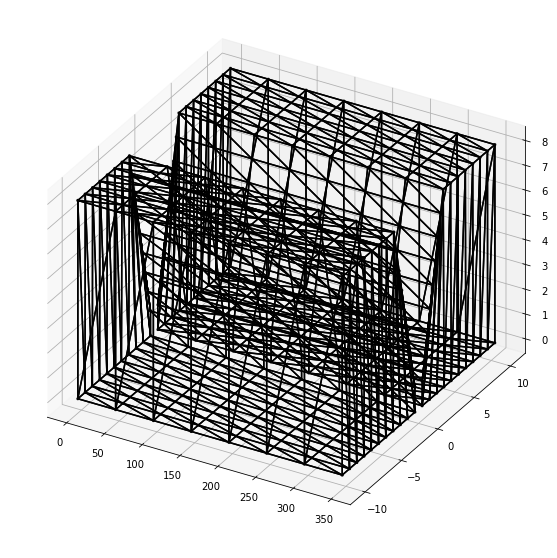

In [9]:
geometry.plot()

By default, the `plot` method shows us the triangulatad data.
But you can also choose to only plot the control points.
This can be achieved by setting the `show_wireframe` parameter to `False`:

C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_lo

<Axes3DSubplot:>

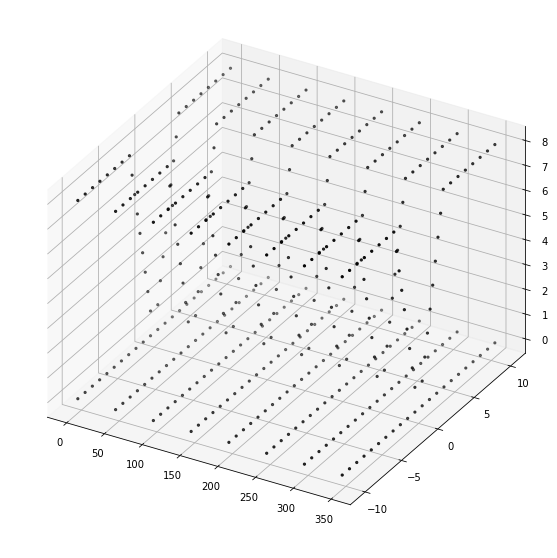

In [10]:
geometry.plot(show_wireframe=False)

The density of the triangle mesh or the point cloud can be controlled py the parameters `profile_raster_width` and `trace_raster_width`.
The first one sets the point density of the individual profiles, while the value of the second one influences, how many profiles are actually drawn.
Both parameters need to be specified as `pint.Quantity`.
You can simply import `Q_` from `weldx` to use quantities or write them as unit string.
Both methods are depicted in the code section below:

C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_lo

<Axes3DSubplot:>

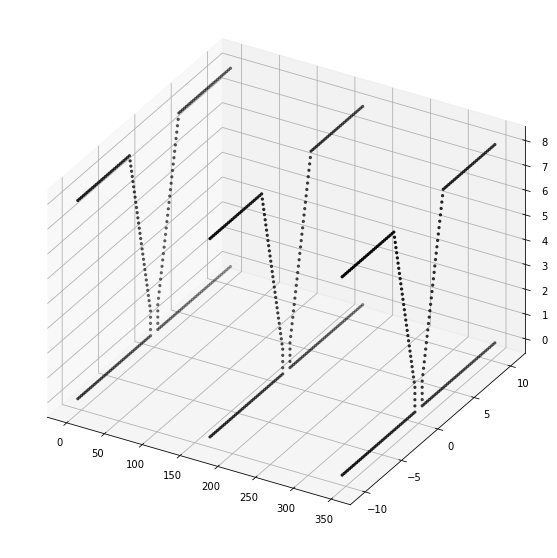

In [11]:
from weldx import Q_

geometry.plot(
    profile_raster_width=Q_(0.25, "mm"), trace_raster_width="17cm", show_wireframe=False
)

As you can see, we now got only 3 densely rendered profiles.
Try some other values to figure out which setting suits you most.

The last command also demonstrates two different ways to provide a Quantity to function that expects.
We can either construct a quantity from a value and a unit like `Q_(0.25, "mm")` or we can combine value and unit in a string as `17cm`.
The second approach does not require us to import `Q_` but it is limited to scalar values and only works for function parameters.

Another noteworthy thing we did in the last command is using length units of different magnitude (`mm` and `cm`).
This is totally fine since `weldx` can handle all necessary conversions internally by utilizing the powerful [Python package `pint`](https://pint.readthedocs.io/en/stable/)


## 3d plot (k3d)

In the previous section we learned how to generate simple 3d-plots from a groove and a seam length using the `plot` method.
By default, `plot` relies on matplotlib as rendering backend.
We have already mentioned before that this is not ideal for 3d renderings.
Therefore, the `weldx` package offers an alternative for jupyter notebook users.
You can select the `k3d` package as rendering backend as follows:

> HINT: In the plain html documentation, you can't interact with the plots. 
        Click on the binder link button at the beginning of the tutorial to start a jupyter-lab session of this tutorial.

In [12]:
geometry.plot(backend="k3d")

C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_lo

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, background_color=16777215, camera=[2, -3, 0.2, 0.0, 0…

Now we got a nice 3d rendering of the geometry with a closed surface that we shift and turn as we like.
However, because `k3d` uses equal axis scaling, we notice that the specimen appears to be rather slim.
The reason for this is that the provided groove types only specify the shape of the groove and not the actual specimen width.
But we can provide one during creation of the geometry using the `width` parameter.
Note that this only works with groove types and not with a plain `Profile`.

In [13]:
geometry_2 = Geometry(groove, t, width="20cm")

C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_lo

Now lets plot the geometry again:

In [14]:
geometry_2.plot(profile_raster_width="5mm", trace_raster_width="16cm", backend="k3d")

C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_lo

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, background_color=16777215, camera=[2, -3, 0.2, 0.0, 0…

## Export 3d geometry into a CAD file

The `Geometry` class also features a `to_file` method.
It allows you to export the 3d data to different file formats like `.ply` or `.stl`.
Using this function, you can inspect the geometry in a CAD program or model viewer of your choice:

In [15]:
geometry.to_file(
    "weldx_geometry.stl", profile_raster_width="5mm", trace_raster_width="50mm"
)

C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Int64Index.get_lo

The parameters `profile_raster_width` and `trace_raster_width` do have the exact same effect as in the `plot` method described before.

## Conclusion

In this tutorial we have learned that WelDX can store geometrical data in form of a 2d-cross section and an extrusion length.
The 2d cross-section can either be of a specialized groove type or a more general `Profile`.
Both can be visualized using the `plot` function and turned into an actual 3d geometry using the `Geometry` class.
The `Geometry` class itself can also be rendered in a 3d plot and exported to a CAD compatible file format.

## Further Readings

- [Supported Groove Types](https://weldx.readthedocs.io/en/latest/tutorials/groove_types_01.html)
- [API tutorial: 3d Geometries](https://weldx.readthedocs.io/en/latest/tutorials/geometry_02_geometry.html)

[<< PREVIOUS TUTORIAL](01_02_time_dependent_data.ipynb) | [NEXT TUTORIAL >>](01_01_introduction.ipynb)